In [1]:
import numpy as np
import matplotlib.pyplot as plt
import mpl_toolkits.axisartist as AA

In [2]:
data = np.genfromtxt("IgnSolution.dat", dtype=str)
Header = (data[0,:]).tolist()
solTchem = (data[1:,:]).astype(np.float)

In [81]:
def makefigure(x, y1, y2, y3, y4, info, fs_label=16, fs_tick=14, figure_name='TempDensVelPFR' ):
    
    label1 = info['label1']['label']
    label2 = info['label2']['label']
    label3 = info['label3']['label']
    label4 = info['label4']['label']
    
    ylabel1 = label1 + info['label1']['units']
    ylabel2 = info['label2']['units']
    
    fig = plt.figure()
#     host = AA.Axes(fig, [0.1, 0.1, 0.8, 0.8]) 
#     fig.add_axes(host)
    host = fig.add_axes([0.1, 0.1, 0.8, 0.8]) 
    par1 = host.twinx()

    host.set_xlabel("Time [s]",fontsize=fs_label)
    host.set_ylabel(ylabel1,fontsize=fs_label)
    par1.set_ylabel(ylabel2,fontsize=fs_label)

    p1 = host.plot(x, y1,'k-', label=label1)
    p2 = par1.plot(x, y2,'b-', label=label2)
    p3 = par1.plot(x, y3,'g-', label=label3)
    p4 = par1.plot(x, y4,'-',color='r',label=label4)

    host.set_yticks([1000,1500,2000,2500])
    loc_x = info['loc_x']
    loc_y = info['loc_y']
    
    par1.set_xlim(info['xlim'])

    # added these three lines
    lns = p1+p2+p3+p4
    labs = [l.get_label() for l in lns]
    host.legend(lns, labs, bbox_to_anchor=(loc_x, loc_y),fontsize=fs_tick,frameon=False)
    
    inset = fig.add_axes([info['inset_x1'], info['inset_y1'], info['inset_x2'], info['inset_y2']]) 
    inset.plot(x, y1,'k.-')
    inset.set_yticks([])
    par2 = inset.twinx()
    par2.set_yticks([])
    par2.plot(x, y2,'b.-')
    par2.plot(x, y3,'g.-')
    par2.plot(x, y4,'.-',color='r')
    inset.set_xlim(info['xlim2'])
    for tick in host.xaxis.get_major_ticks()+host.yaxis.get_major_ticks():
        tick.label.set_fontsize(fs_tick)
    for tick in inset.xaxis.get_major_ticks():
        tick.label.set_fontsize(fs_tick-2)
    for tick in par1.yaxis.get_major_ticks():
        tick.label2.set_fontsize(fs_tick)

    plt.savefig(figure_name,bbox_inches='tight')
    return 


In [82]:
CH4_indx = Header.index('CH4')
O2_indx = Header.index('O2')
CO_indx = Header.index('CO')

In [83]:
info={}
info['label1'] = {'label':'Temperature','units':' [K]'}
info['label2'] = {'label': 'CH4','units':' Mass Fraction'}
info['label3'] = {'label': 'O2','units':'  Mass Fraction'}
info['label4'] = {'label': 'CO','units':'  Mass Fraction'}

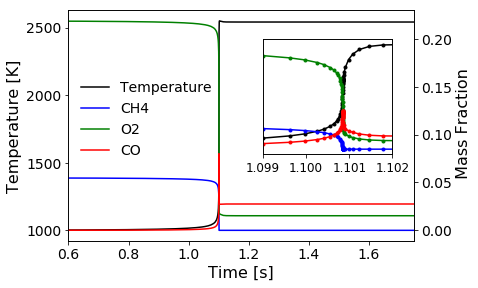

In [84]:
info['loc_x'] = 0.45
info['loc_y'] = 0.75
info['xlim'] = [0.6,1.75]
info['xlim2'] = [1.099,1.102]
info['inset_x1'] = 0.55 
info['inset_y1'] = 0.4
info['inset_x2'] = 0.3
info['inset_y2'] = 0.4

x  = solTchem[:,1]
y1 = solTchem[:,5]
y2 = solTchem[:,CH4_indx]
y3 = solTchem[:,O2_indx]
y4 = solTchem[:,CO_indx]
makefigure(x, y1, y2, y3, y4, info, fs_label=16, fs_tick=14, figure_name='TempMassFraction2.pdf')

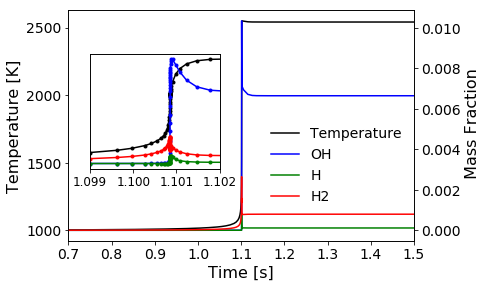

In [89]:
info={}
info['label1'] = {'label':'Temperature','units':' [K]'}
info['label2'] = {'label': 'OH','units':' Mass Fraction'}
info['label3'] = {'label': 'H','units':'  Mass Fraction'}
info['label4'] = {'label': 'H2','units':' Mass Fraction'}
info['loc_x'] = 0.55
info['loc_y'] = 0.55
info['xlim'] = [0.7,1.5]
info['xlim2'] = [1.099,1.102]
info['inset_x1'] = 0.15 
info['inset_y1'] = 0.35
info['inset_x2'] = 0.3
info['inset_y2'] = 0.4
OH_indx = Header.index('OH')
H_indx = Header.index('H')
H2_indx = Header.index('H2')
y1 = solTchem[:,5]
y2 = solTchem[:,OH_indx]
y3 = solTchem[:,H_indx]
y4 = solTchem[:,H2_indx]
makefigure(x, y1, y2, y3, y4, info, figure_name='TempMassFraction3.pdf')